In [1]:
#based on the tutorial in the following page.
#http://nilearn.github.io/auto_examples/03_connectivity/plot_probabilistic_atlas_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-probabilistic-atlas-extraction-py
%matplotlib inline

#Retrieve the dataset
from nilearn import datasets
adhd_dataset = datasets.fetch_adhd(n_subjects=1)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      adhd_dataset.func[0])  # 4D data

First subject functional nifti image (4D) is at: /Users/admin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [2]:
#Coordinates of Default Mode Network
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
          'Posterior Cingulate Cortex',
          'Left Temporoparietal junction',
          'Right Temporoparietal junction',
          'Medial prefrontal cortex',
         ]

In [3]:
#Extracts signal from sphere around DMN seeds

from nilearn import input_data

masker = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=2)

func_filename = adhd_dataset.func[0]
confound_filename = adhd_dataset.confounds[0]

time_series = masker.fit_transform(func_filename,
                                   confounds=[confound_filename])

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/admin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 2.5}, memory_level=1, verbose=2, memory=Memory(cachedir='nilearn_cache/joblib'), confounds=['/Users/admin/nilearn_data/adhd/data/0010042/0010042_regressors.csv'])
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Users/admin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
____________________________________________

/Users/admin/.local/lib/python3.5/site-packages/nilearn/_utils/cache_mixin.py:118: UserWarning: Incompatible cache in nilearn_cache/joblib: different version of nibabel. Deleting the cache. Put nilearn.CHECK_CACHE_VERSION to false to avoid this behavior.
  % cachedir)


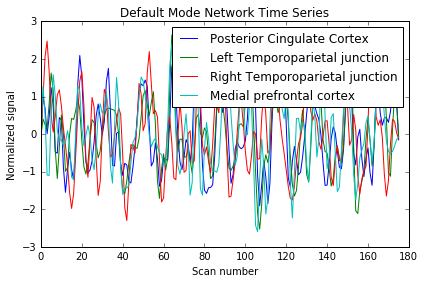

In [4]:
#Display time series

import matplotlib.pyplot as plt
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

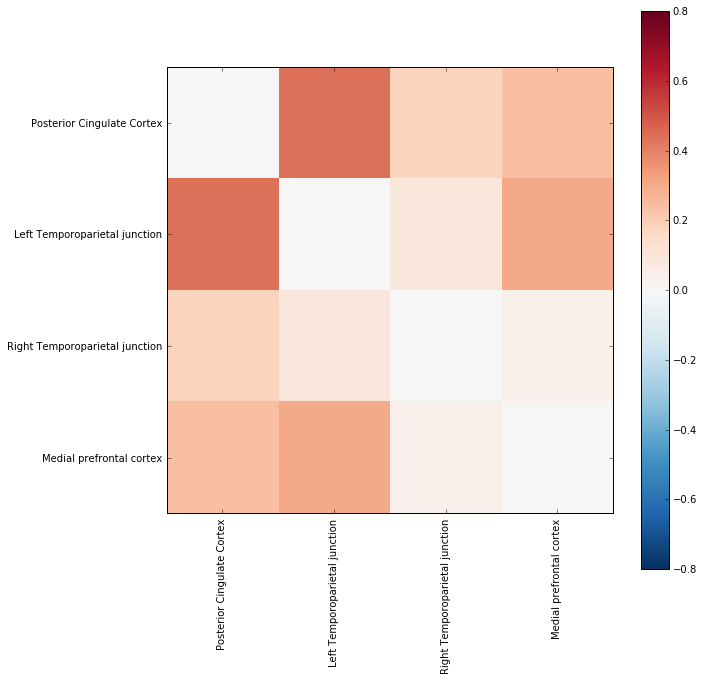

In [5]:
#Compute partial correlation matrix

from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]


# Display the correlation matrix
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
# Mask out the major diagonal
np.fill_diagonal(partial_correlation_matrix, 0)
plt.imshow(partial_correlation_matrix, interpolation="nearest", cmap="RdBu_r",
           vmax=0.8, vmin=-0.8)
plt.colorbar()
# And display the labels
x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
y_ticks = plt.yticks(range(len(labels)), labels)

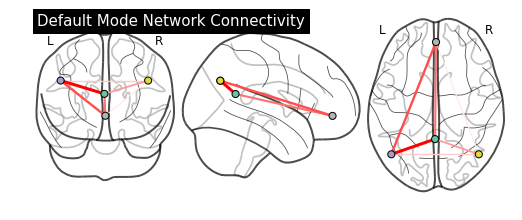

In [6]:
#Display connectome
from nilearn import plotting

plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="Default Mode Network Connectivity")